In [23]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

# Project 
## Final Marks ML Prediction Results 

## In this project we will discover and predict final marks based on the study attendance hours of students.

In [24]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Study_vs_Score_data.csv")

# Data Info 

In [25]:
df.shape

(1000, 2)

In [26]:
df.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  1000 non-null   float64
 1   Final_Marks       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# Data Handling & Cleaning 

In [37]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# Machine Learning & Visualizaton

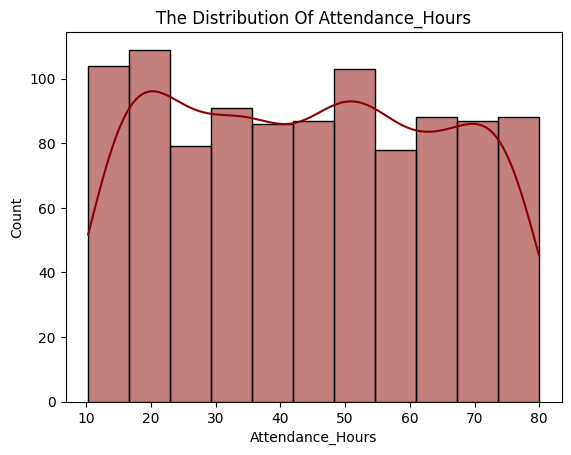

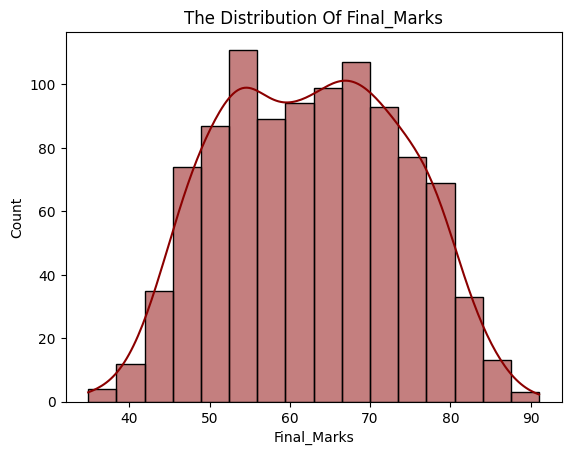

In [28]:
for col in df:
    plt.Figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,edgecolor="black",color="darkred")
    plt.title(f"The Distribution Of {col}")
    plt.show()

# Linear Regression Model 

## Data distribution sample of linear tendencies 

<Axes: xlabel='Attendance_Hours', ylabel='Final_Marks'>

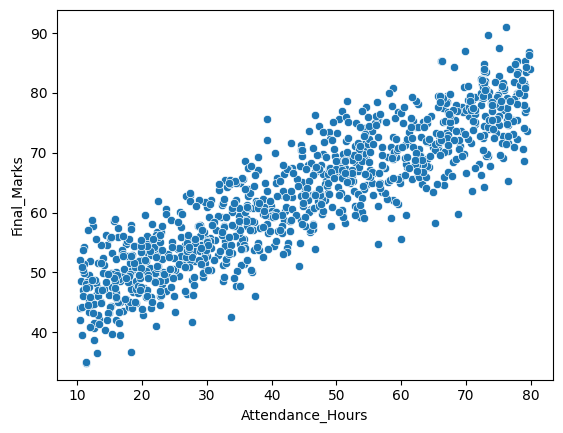

In [29]:
sns.scatterplot(data=df,x="Attendance_Hours",y="Final_Marks")

In [30]:
df.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [31]:
x=df.drop(columns=["Final_Marks"])
y=df["Final_Marks"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LinearRegression()
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred=model.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 3.6023955438952053
MSE: 21.43431166454385
RMSE: 4.629720473694265
R² Score: 0.8233456032324955


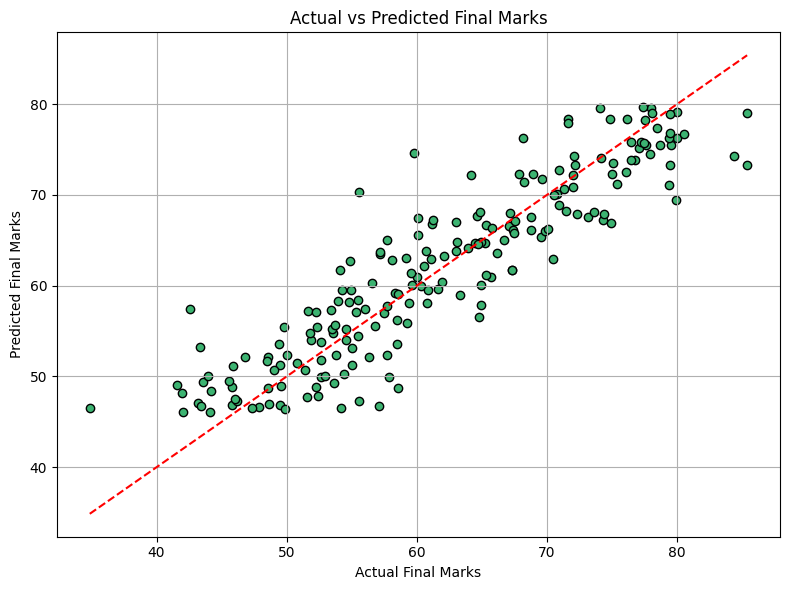

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='mediumseagreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Final Marks')
plt.ylabel('Predicted Final Marks')
plt.title('Actual vs Predicted Final Marks')
plt.grid(True)
plt.tight_layout()
plt.show()


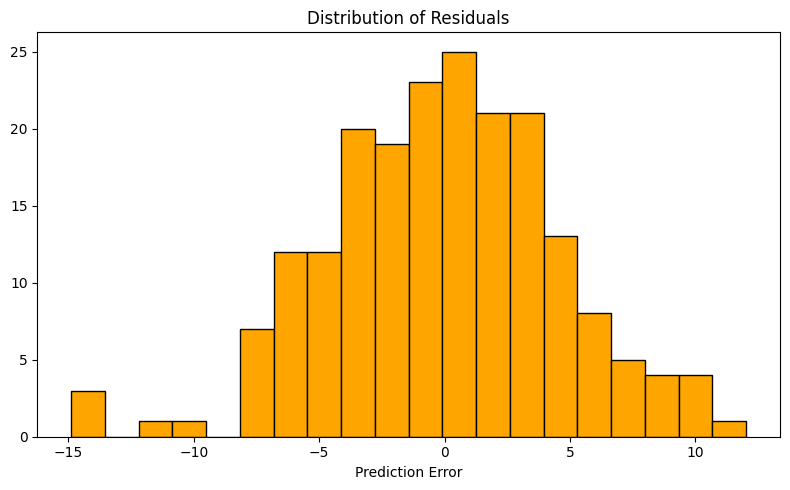

In [35]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.tight_layout()
plt.show()
